This is a Project for the flight Analysis.
Data collection has done in different python file
This notebook only has the data collection,preprocessing and some EDA steps

Step 1 : Load the needed Library for the project


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Step 2: Loading the Data

In [2]:
data =  pd.read_csv('/content/indian_flight_data.csv')

In [3]:
data.head()

,Flight Number,Origin City,Destination City,Departure Date,Arrival Date,Total Duration,Stops,Airline,Airline.1,Price,Review
0,FL-1,Ahmedabad,Bangalore,2024-01-01 00:00,2024-01-01 00:00,1h 57m,0,6E,IndiGo Airlines,9278,Excellent
1,FL-2,Ahmedabad,Mumbai,2024-01-01 01:00,2024-01-01 01:00,5h 43m,0,6E,IndiGo Airlines,11427,Good
2,FL-3,Ahmedabad,Kolkata,2024-01-01 02:00,2024-01-01 02:00,4h 52m,0,6E,IndiGo Airlines,9093,Excellent
3,FL-4,Ahmedabad,Delhi,2024-01-01 03:00,2024-01-01 03:00,2h 26m,0,6E,IndiGo Airlines,5109,Good
4,FL-5,Ahmedabad,Goa,2024-01-01 04:00,2024-01-01 04:00,2h 15m,0,6E,IndiGo Airlines,3043,Excellent


Checking the columns present in the dataset

In [4]:
data.columns

Index(['Flight Number', 'Origin City', 'Destination City', 'Departure Date',
       'Arrival Date', 'Total Duration', 'Stops', 'Airline', 'Airline.1',
       'Price', 'Review'],
      dtype='object')

Most of the columns are in object datatype ,it could Affect the model training ,so it is necessary to convert them into int datatype As much as possible

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057 entries, 0 to 1056
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Flight Number     1057 non-null   object
 1   Origin City       1057 non-null   object
 2   Destination City  1057 non-null   object
 3   Departure Date    1057 non-null   object
 4   Arrival Date      1057 non-null   object
 5   Total Duration    1057 non-null   object
 6   Stops             1057 non-null   int64 
 7   Airline           1057 non-null   object
 8   Airline.1         1057 non-null   object
 9   Price             1057 non-null   int64 
 10  Review            1057 non-null   object
dtypes: int64(2), object(9)
memory usage: 91.0+ KB


No Null values 😎😎😎

In [5]:
data.isnull().sum()

,0
Flight Number,0
Origin City,0
Destination City,0
Departure Date,0
Arrival Date,0
Total Duration,0
Stops,0
Airline,0
Airline.1,0
Price,0


No duplicates 😎😎

In [8]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1052,False
1053,False
1054,False
1055,False


##Categorizing the Dataset as Numerical ,Categorical and Cardinality

This is somewhat confusing but it is a step for Finding the categorical and cardinal columns .The Cardinal columns has to be removed ,since it affects the model and Categorical Columns has to use coz' it works like a separate categories

In [14]:
def grab_col_names(df,cat_th=10,car_th=20):
  cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
  num_but_cat = [col for col in df.columns if df[col].nunique() < cat_th and df[col].dtypes!="O"]
  cat_but_car = [col for col in df.columns if df[col].nunique() > car_th and df[col].dtypes =="O"]
  cat_cols = cat_cols + num_but_cat
  cat_cols =[col for col in cat_cols if col not in cat_but_car]

  num_cols = [col for col in df.columns if df[col].dtypes!="O"]
  num_cols = [col for col in num_cols if col not in num_but_cat]

  print(f"Observations: {df.shape[0]}")
  print(f"Variables: {df.shape[1]}")
  print(f'cat_cols: {len(cat_cols)}')
  print(f'num_cols: {len(num_cols)}')
  print(f'cat_but_cat: {len(cat_but_car)}')

  return cat_cols,num_cols,cat_but_car



In [15]:
cat_cols,num_cols,cat_but_car = grab_col_names(data)
print(cat_cols)
print(num_cols)
print(cat_but_car)

Observations: 1057
Variables: 11
cat_cols: 4
num_cols: 1
cat_but_cat: 6
['Airline', 'Airline.1', 'Review', 'Stops']
['Price']
['Flight Number', 'Origin City', 'Destination City', 'Departure Date', 'Arrival Date', 'Total Duration']


In [16]:
data_types = data.dtypes
print(data_types)

Flight Number       object
Origin City         object
Destination City    object
Departure Date      object
Arrival Date        object
Total Duration      object
Stops                int64
Airline             object
Airline.1           object
Price                int64
Review              object
dtype: object


In [18]:
data['Departure Date'] = pd.to_datetime(data['Departure Date'])
data['Arrival Date'] = pd.to_datetime(data['Arrival Date'])

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057 entries, 0 to 1056
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Flight Number     1057 non-null   object        
 1   Origin City       1057 non-null   object        
 2   Destination City  1057 non-null   object        
 3   Departure Date    1057 non-null   datetime64[ns]
 4   Arrival Date      1057 non-null   datetime64[ns]
 5   Total Duration    1057 non-null   object        
 6   Stops             1057 non-null   int64         
 7   Airline           1057 non-null   object        
 8   Airline.1         1057 non-null   object        
 9   Price             1057 non-null   int64         
 10  Review            1057 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 91.0+ KB


In [21]:
data['Departure_Day'] = data['Departure Date'].dt.day
data['Departure_Month'] = data['Departure Date'].dt.month
data['Arrival_Day'] = data['Arrival Date'].dt.day
data['Arrival_Month'] = data['Arrival Date'].dt.month

data['Duration_Hours'] = data['Total Duration'].apply(
    lambda x: int(x.split('h')[0].strip()) if 'h' in x else 0
)
data['Duration_Minutes'] = data['Total Duration'].apply(
    lambda x: int(x.split('m')[0].split()[-1].strip()) if 'm' in x else 0
)

In [22]:
data.head()

,Flight Number,Origin City,Destination City,Departure Date,Arrival Date,Total Duration,Stops,Airline,Airline.1,Price,Review,Departure_Day,Departure_Month,Arrival_Day,Arrival_Month,Duration_Hours,Duration_Minutes
0,FL-1,Ahmedabad,Bangalore,2024-01-01 00:00:00,2024-01-01 00:00:00,1h 57m,0,6E,IndiGo Airlines,9278,Excellent,1,1,1,1,1,57
1,FL-2,Ahmedabad,Mumbai,2024-01-01 01:00:00,2024-01-01 01:00:00,5h 43m,0,6E,IndiGo Airlines,11427,Good,1,1,1,1,5,43
2,FL-3,Ahmedabad,Kolkata,2024-01-01 02:00:00,2024-01-01 02:00:00,4h 52m,0,6E,IndiGo Airlines,9093,Excellent,1,1,1,1,4,52
3,FL-4,Ahmedabad,Delhi,2024-01-01 03:00:00,2024-01-01 03:00:00,2h 26m,0,6E,IndiGo Airlines,5109,Good,1,1,1,1,2,26
4,FL-5,Ahmedabad,Goa,2024-01-01 04:00:00,2024-01-01 04:00:00,2h 15m,0,6E,IndiGo Airlines,3043,Excellent,1,1,1,1,2,15


In [30]:
data.drop(['Total Duration'], axis=1, inplace=True)
data.head(5)

,Flight Number,Origin City,Destination City,Stops,Airline,Airline.1,Price,Review,Departure_Day,Departure_Month,Arrival_Day,Arrival_Month,Duration_Hours,Duration_Minutes
0,FL-1,Ahmedabad,Bangalore,0,6E,IndiGo Airlines,9278,Excellent,1,1,1,1,1,57
1,FL-2,Ahmedabad,Mumbai,0,6E,IndiGo Airlines,11427,Good,1,1,1,1,5,43
2,FL-3,Ahmedabad,Kolkata,0,6E,IndiGo Airlines,9093,Excellent,1,1,1,1,4,52
3,FL-4,Ahmedabad,Delhi,0,6E,IndiGo Airlines,5109,Good,1,1,1,1,2,26
4,FL-5,Ahmedabad,Goa,0,6E,IndiGo Airlines,3043,Excellent,1,1,1,1,2,15


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057 entries, 0 to 1056
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Flight Number     1057 non-null   object
 1   Origin City       1057 non-null   object
 2   Destination City  1057 non-null   object
 3   Stops             1057 non-null   int64 
 4   Airline           1057 non-null   object
 5   Airline.1         1057 non-null   object
 6   Price             1057 non-null   int64 
 7   Review            1057 non-null   object
 8   Departure_Day     1057 non-null   int32 
 9   Departure_Month   1057 non-null   int32 
 10  Arrival_Day       1057 non-null   int32 
 11  Arrival_Month     1057 non-null   int32 
 12  Duration_Hours    1057 non-null   int64 
 13  Duration_Minutes  1057 non-null   int64 
dtypes: int32(4), int64(4), object(6)
memory usage: 99.2+ KB


In [32]:
object_columns = data.select_dtypes(include=['object'])


for col in object_columns.columns:
    unique_values = object_columns[col].unique()
    print(f"Unique values in '{col}': {unique_values}")

Unique values in 'Flight Number': ['FL-1' 'FL-2' 'FL-3' ... 'FL-1055' 'FL-1056' 'FL-1057']
Unique values in 'Origin City': ['Ahmedabad' 'Bhubaneswar' 'Baroda' 'Bangalore' 'Mumbai' 'Kolkata'
 'Coimbatore' 'Kochi' 'Delhi' 'Mohanbari' 'Guwahati' 'Goa' 'Hyderabad'
 'Indore' 'Imphal' 'Agartala' 'Baghdogra' 'Chandigarh' 'Jammu' 'Ranchi'
 'Jaipur' 'Lucknow' 'Madras' 'Nagpur' 'Patina' 'Pune' 'Raipur' 'Srinagar'
 'Trivandrum' 'Varanasi' 'Vishakhapatnam' 'Aizwal' 'Amritsar' 'Bhuj'
 'Bhopal' 'Bhaunagar' 'Calicut' 'Dehra Dun' 'Diu' 'Gorakhpur' 'Mangalore'
 'Leh' 'Madurai' 'Silchar' 'Aurangabad' 'Port Blair' 'Jodhpur' 'Porbandar'
 'Rajkot' 'Rajahmundry' 'Tiruchirappalli' 'Udaipur' 'Agra' 'Agatti Island'
 'Kangra' 'Dimapur' 'Gwalior' 'Khajuraho' 'Allahabad' 'Jamnagar'
 'Jabalpur' 'Kanpur' 'Kulu' 'Ludhiaha' 'Shillong' 'Surat' 'Tirupeti'
 'Vijayawada' 'Hubli' 'Belgaum' 'Mysore']
Unique values in 'Destination City': ['Bangalore' 'Mumbai' 'Kolkata' 'Delhi' 'Goa' 'Hyderabad' 'Jaipur'
 'Madras' 'Pune' 'Vi

Correlation analysis

In [33]:
numeric_data = data.select_dtypes(include=['number'])


correlation_mat = numeric_data.corr()
print(correlation_mat)

                  Stops     Price  Departure_Day  Departure_Month  \
Stops               NaN       NaN            NaN              NaN   
Price               NaN  1.000000       0.060451        -0.024295   
Departure_Day       NaN  0.060451       1.000000        -0.466218   
Departure_Month     NaN -0.024295      -0.466218         1.000000   
Arrival_Day         NaN  0.060451       1.000000        -0.466218   
Arrival_Month       NaN -0.024295      -0.466218         1.000000   
Duration_Hours      NaN -0.009832       0.009731         0.006241   
Duration_Minutes    NaN  0.037133       0.041466         0.008649   

                  Arrival_Day  Arrival_Month  Duration_Hours  Duration_Minutes  
Stops                     NaN            NaN             NaN               NaN  
Price                0.060451      -0.024295       -0.009832          0.037133  
Departure_Day        1.000000      -0.466218        0.009731          0.041466  
Departure_Month     -0.466218       1.000000        0.

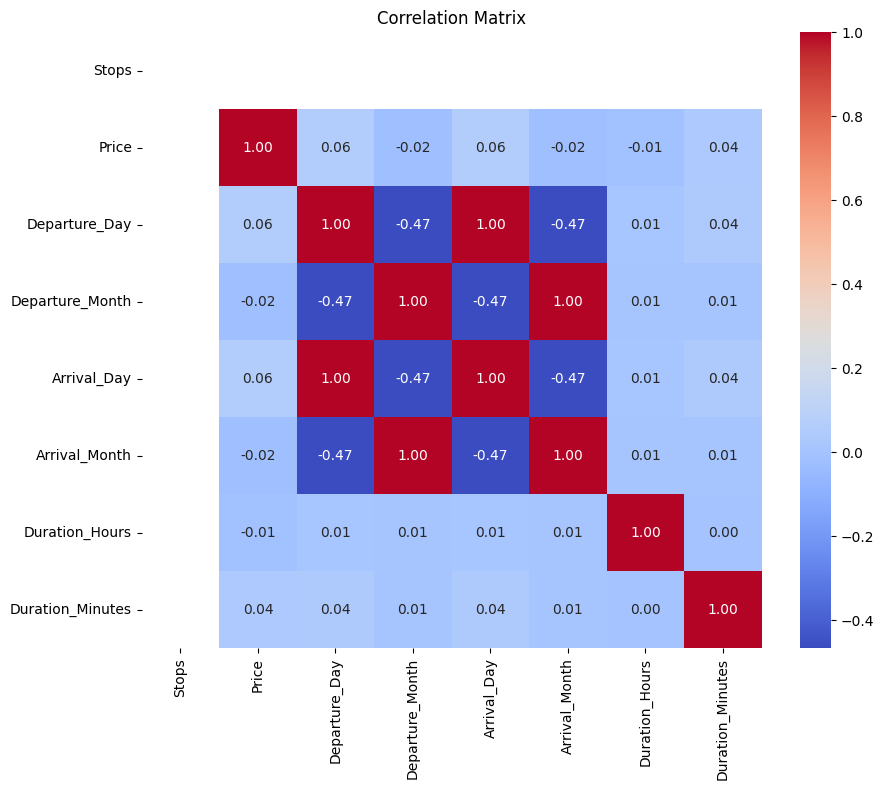

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_mat, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [36]:
data = data.drop(columns=['Arrival_Day', 'Arrival_Month','Stops'])
data = data.rename(columns={'Departure_Day': 'Travel_Day', 'Departure_Month': 'Travel_Month'})

In [37]:
data['Duration_Minutes'] = data['Duration_Minutes'] + (data['Duration_Hours'] * 60)

data = data.drop(columns=['Duration_Hours'])

data.head(5)

,Flight Number,Origin City,Destination City,Airline,Airline.1,Price,Review,Travel_Day,Travel_Month,Duration_Minutes
0,FL-1,Ahmedabad,Bangalore,6E,IndiGo Airlines,9278,Excellent,1,1,117
1,FL-2,Ahmedabad,Mumbai,6E,IndiGo Airlines,11427,Good,1,1,343
2,FL-3,Ahmedabad,Kolkata,6E,IndiGo Airlines,9093,Excellent,1,1,292
3,FL-4,Ahmedabad,Delhi,6E,IndiGo Airlines,5109,Good,1,1,146
4,FL-5,Ahmedabad,Goa,6E,IndiGo Airlines,3043,Excellent,1,1,135


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057 entries, 0 to 1056
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Flight Number     1057 non-null   object
 1   Origin City       1057 non-null   object
 2   Destination City  1057 non-null   object
 3   Airline           1057 non-null   object
 4   Airline.1         1057 non-null   object
 5   Price             1057 non-null   int64 
 6   Review            1057 non-null   object
 7   Travel_Day        1057 non-null   int32 
 8   Travel_Month      1057 non-null   int32 
 9   Duration_Minutes  1057 non-null   int64 
dtypes: int32(2), int64(2), object(6)
memory usage: 74.4+ KB


In [39]:
numeric_data = data.select_dtypes(include=['number'])


correlation_mat = numeric_data.corr()
print(correlation_mat)

                     Price  Travel_Day  Travel_Month  Duration_Minutes
Price             1.000000    0.060451     -0.024295         -0.002149
Travel_Day        0.060451    1.000000     -0.466218          0.017885
Travel_Month     -0.024295   -0.466218      1.000000          0.007855
Duration_Minutes -0.002149    0.017885      0.007855          1.000000


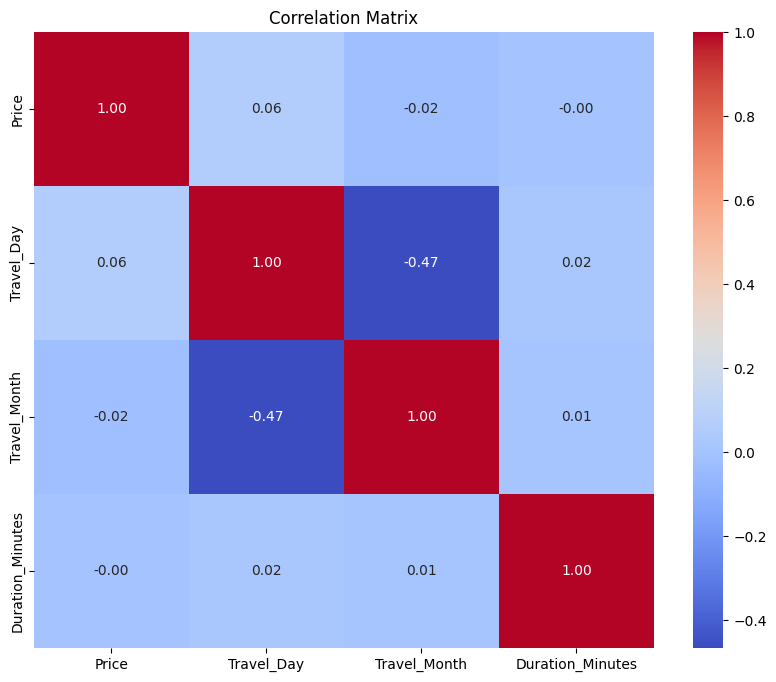

In [40]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_mat, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [42]:
review_encoded = pd.get_dummies(data['Review'], prefix='Review', drop_first=True)


data = pd.concat([data, review_encoded], axis=1)


data = data.drop(columns=['Review'])

In [43]:
data.head(3)

,Flight Number,Origin City,Destination City,Airline,Airline.1,Price,Travel_Day,Travel_Month,Duration_Minutes,Review_Good,Review_Good
0,FL-1,Ahmedabad,Bangalore,6E,IndiGo Airlines,9278,1,1,117,False,False
1,FL-2,Ahmedabad,Mumbai,6E,IndiGo Airlines,11427,1,1,343,True,True
2,FL-3,Ahmedabad,Kolkata,6E,IndiGo Airlines,9093,1,1,292,False,False


In [44]:
data.columns

Index(['Flight Number', 'Origin City', 'Destination City', 'Airline',
       'Airline.1', 'Price', 'Travel_Day', 'Travel_Month', 'Duration_Minutes',
       'Review_Good', 'Review_Good'],
      dtype='object')

Here ,I made a Little Mistake That is I intentionally tried to make the One-hot Encoding for the Review ,cause it has only two parameters exccellent and good but both of them in the same name

In [45]:
original_data = pd.read_csv('/content/indian_flight_data.csv')
data['Review'] = original_data['Review']

In [48]:

data = data.drop(columns=['Review_Good'])


In [49]:
review_encoded = pd.get_dummies(data['Review'], prefix='Review', drop_first=True)
data = pd.concat([data, review_encoded], axis=1)
data = data.drop(columns=['Review'])
print(data)

     Flight Number     Origin City Destination City Airline        Airline.1  \
0             FL-1       Ahmedabad        Bangalore      6E  IndiGo Airlines   
1             FL-2       Ahmedabad           Mumbai      6E  IndiGo Airlines   
2             FL-3       Ahmedabad          Kolkata      6E  IndiGo Airlines   
3             FL-4       Ahmedabad            Delhi      6E  IndiGo Airlines   
4             FL-5       Ahmedabad              Goa      6E  IndiGo Airlines   
...            ...             ...              ...     ...              ...   
1052       FL-1053      Vijayawada        Hyderabad      SG         Spicejet   
1053       FL-1054        Varanasi            Delhi      SG         Spicejet   
1054       FL-1055  Vishakhapatnam        Bangalore      SG         Spicejet   
1055       FL-1056  Vishakhapatnam        Hyderabad      SG         Spicejet   
1056       FL-1057  Vishakhapatnam           Madras      SG         Spicejet   

      Price  Travel_Day  Travel_Month  

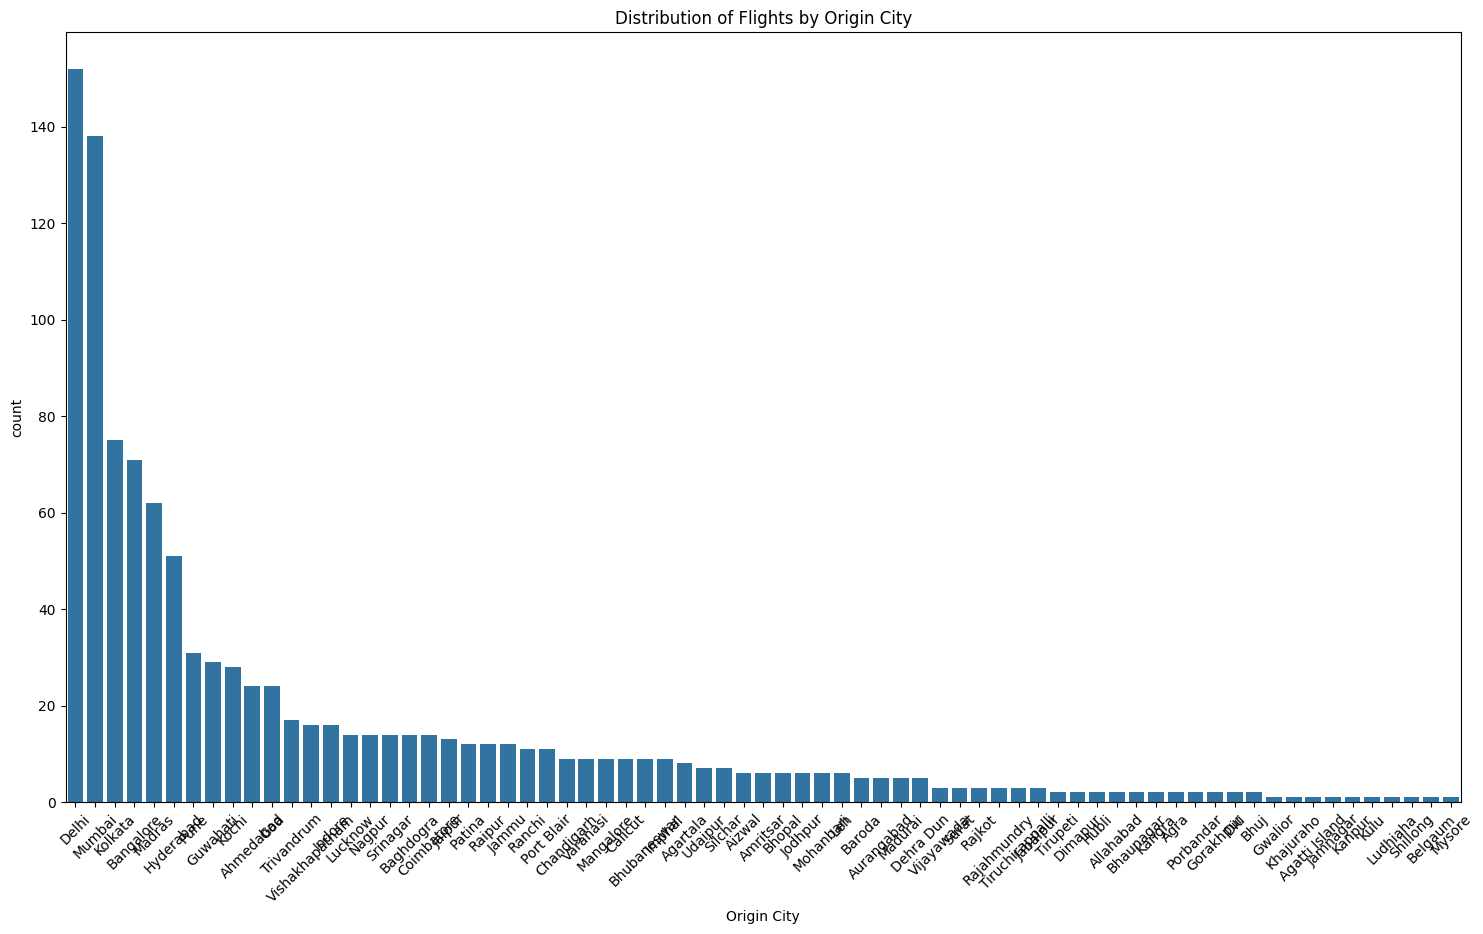

In [51]:
plt.figure(figsize=(18, 10))
sns.countplot(data=data, x='Origin City', order=data['Origin City'].value_counts().index)
plt.title('Distribution of Flights by Origin City')
plt.xticks(rotation=45)
plt.show()

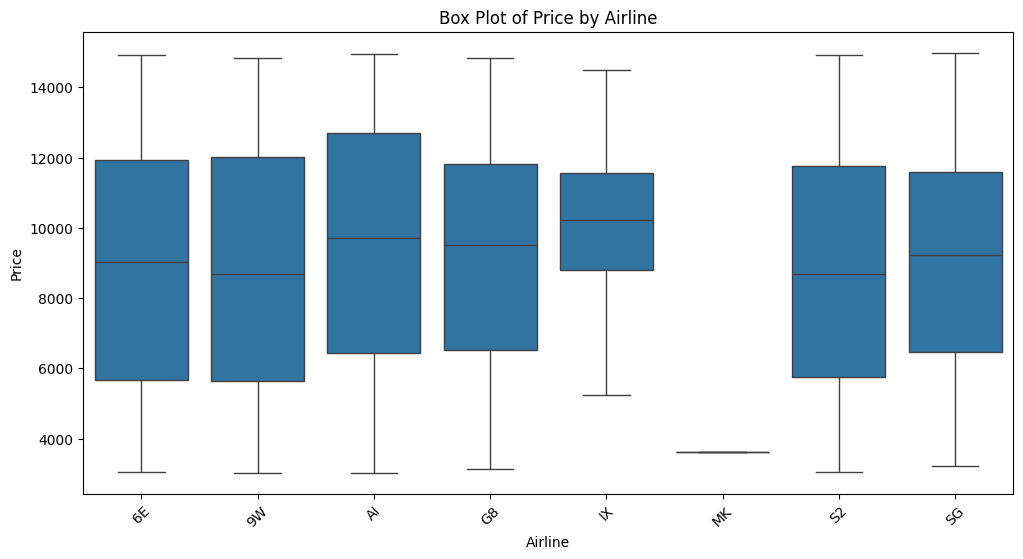

In [52]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Airline', y='Price')
plt.title('Box Plot of Price by Airline')
plt.xticks(rotation=45)
plt.show()


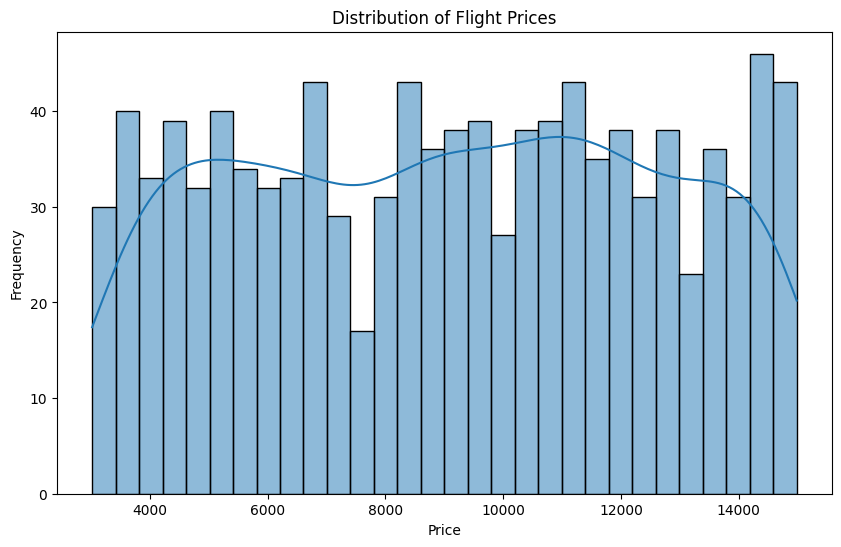

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=30, kde=True)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


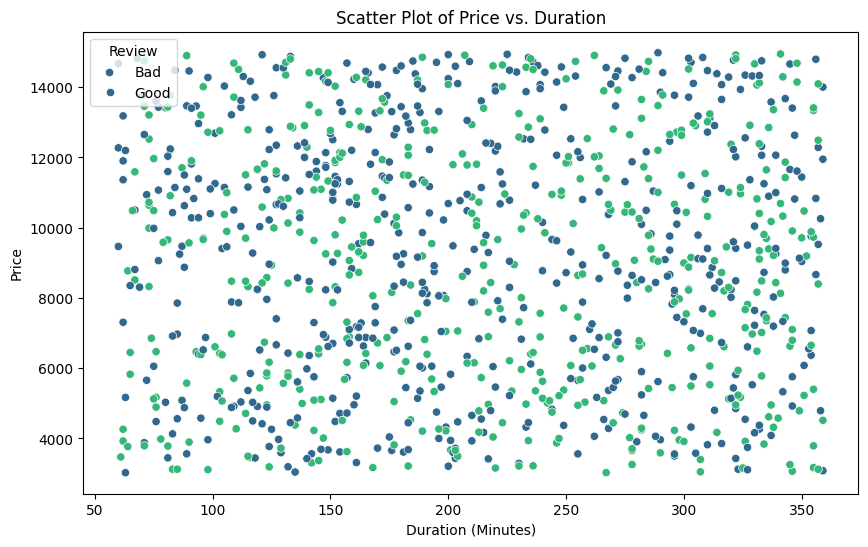

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Duration_Minutes', y='Price', hue='Review_Good', palette='viridis')
plt.title('Scatter Plot of Price vs. Duration')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Price')
plt.legend(title='Review', loc='upper left', labels=['Bad', 'Good'])  # Labels for True and False
plt.show()


# That's all